In [13]:
# ================基于XGBoost原生接口的分类=============
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score   # 准确率
# 加载样本数据集
iris = load_iris()
X,y = iris.data,iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234565) # 数据集分割

# 算法参数
params = {
    #'booster': 'gbtree',
    #'objective': 'multi:softmax',
    'num_class': 3,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    #'subsample': 0.7,
    #'colsample_bytree': 0.7,
    #'min_child_weight': 3,
    #'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    #'nthread': 4,
}

plst = params.items()

In [14]:
dtrain = xgb.DMatrix(X_train, y_train) # 生成数据集格式
num_rounds = 50
model = xgb.train(plst, dtrain, num_rounds) # xgboost模型训练

accuarcy: 96.67%


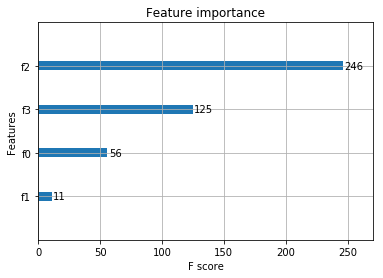

In [15]:
# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest)

# 计算准确率
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy: %.2f%%" % (accuracy*100.0))

# 显示重要特征
plot_importance(model)
plt.show()